In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [4]:
dev_words = pd.read_csv("development.csv").drop("id", axis=1)
features_name = pd.read_csv("idx_to_feature_name.csv").drop("index", axis=1)

In [5]:

# Загружаем данные
dev_arr = np.load("development.npy")[:40834]
dev_arr.shape

(40834, 175, 44)

In [6]:
word_list = list(dev_words.iloc[:40834].filename)
new_list = list(map(lambda x: x.split("/")[1], word_list))
idx_haus = [i for i, word in enumerate(new_list) if word == 'Haus']
idx_haus[:5]


[7, 21, 25, 36, 87]

**Bandwidth**


In [10]:
idx_bandwidth_0 = features_name[features_name['feature_name'] == 'bandwidth_0'].index
idx_bandwidth_0

Index([0], dtype='int64')

In [11]:
bandwidth_data_Haus = dev_arr[idx_haus, idx_bandwidth_0, :]


# 1. Просмотр данных
print(bandwidth_data_Haus.shape)  # Проверим форму массива

# Выведем несколько примеров данных
print(bandwidth_data_Haus[:5, :])  # Выведем первые пять записей для ознакомления с данным

(2042, 44)
[[3076.34482205 3277.17531337 3399.06325853 3556.20756599 3525.78260064
  3503.96812901 3035.84361315 3123.57316391 2770.68990407 2694.37054566
  2775.05631485 2609.09680603 1980.37045902 1842.93590753 1890.08551144
  1986.4396037  1656.95443163 1250.35707315 1217.9555186   978.70983659
   945.9419567  1118.12557306 1450.65666408 1426.08699594 2943.83870816
  3056.78534174 2870.42861595 2798.19681608 2884.45654116 2770.66772528
  2816.10322411 2833.9247001  2836.98916971 3396.19370167 3512.95756847
  3691.79202316 3430.3913564  3322.61328605 3547.12042889 3450.69314603
  3373.14105717 3303.67704542 3536.00926508 3553.29715153]
 [3669.87767425 3620.47066587 3319.04064635 3306.79973512 2982.11624279
  2838.90035534 2658.47932023 2700.57308623 2638.43516168 2557.5392807
  2514.33548007 1905.62492293 1811.26538889 2016.48365981 1372.51045799
  1302.53043223 1444.42930682 1286.38071432 1225.20347275 1087.84375652
   957.56439453 1080.24430153 1263.64657679 1564.9447943  3219.0391

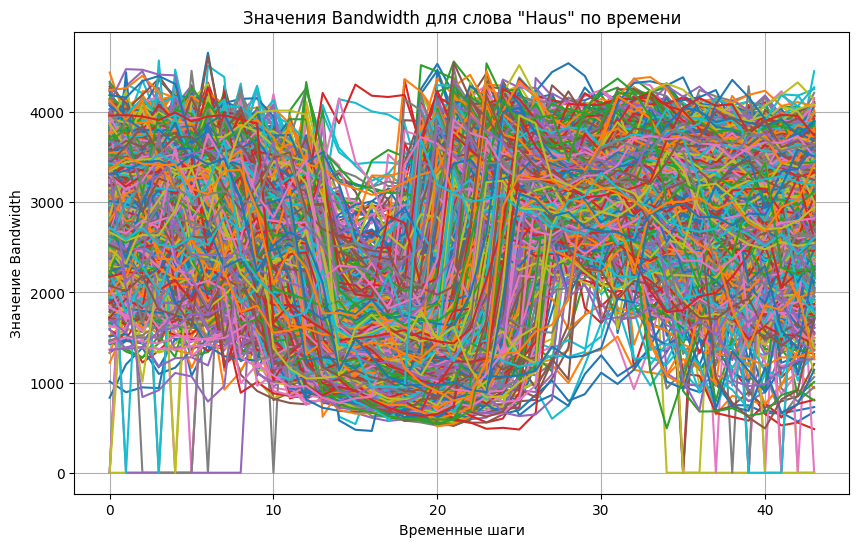

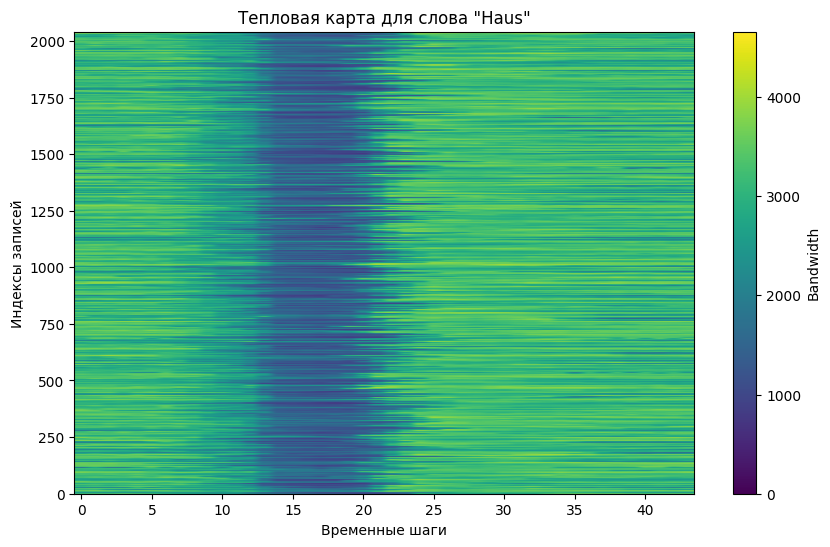

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data_Haus.T)  # Транспонируем данные для корректного отображения временных шагов по оси X
plt.xlabel('Временные шаги')
plt.ylabel('Значение Bandwidth')
plt.title('Значения Bandwidth для слова "Haus" по времени')
plt.grid(True)
plt.show()

# Тепловая карта
plt.figure(figsize=(10, 6))
plt.imshow(bandwidth_data_Haus, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Bandwidth')
plt.xlabel('Временные шаги')
plt.ylabel('Индексы записей')
plt.title('Тепловая карта для слова "Haus"')
plt.show()

In [13]:
idx_aus = [i for i, word in enumerate(new_list) if word == 'aus']
bandwidth_data_aus = dev_arr[idx_aus, idx_bandwidth_0, :]

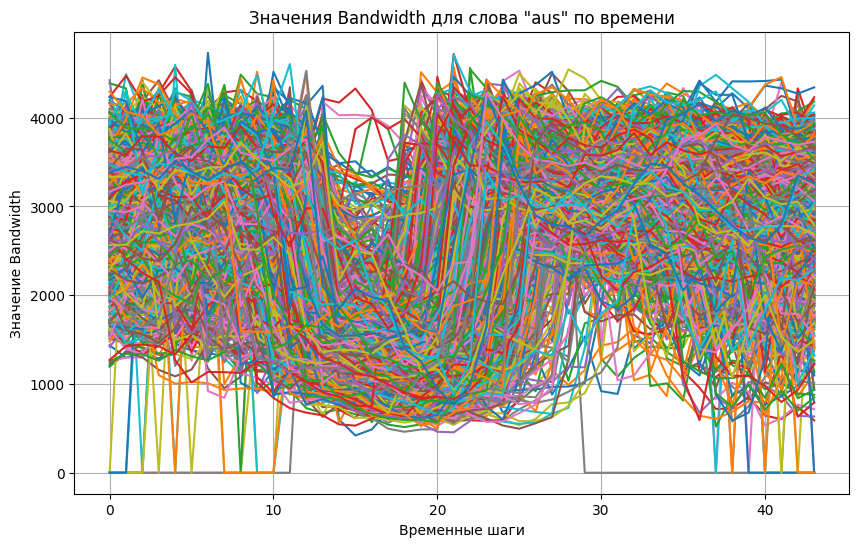

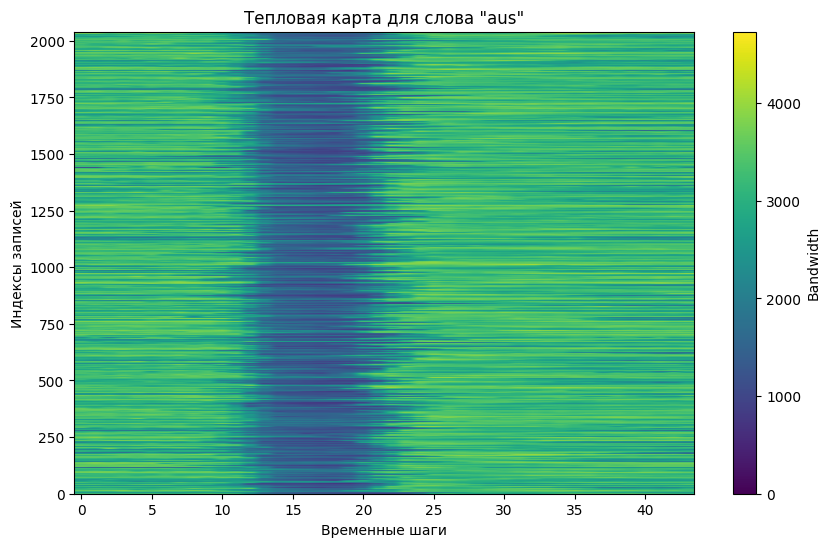

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data_aus.T)  # Транспонируем данные для корректного отображения временных шагов по оси X
plt.xlabel('Временные шаги')
plt.ylabel('Значение Bandwidth')
plt.title('Значения Bandwidth для слова "aus" по времени')
plt.grid(True)
plt.show()

# Тепловая карта
plt.figure(figsize=(10, 6))
plt.imshow(bandwidth_data_aus, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Bandwidth')
plt.xlabel('Временные шаги')
plt.ylabel('Индексы записей')
plt.title('Тепловая карта для слова "aus"')
plt.show()

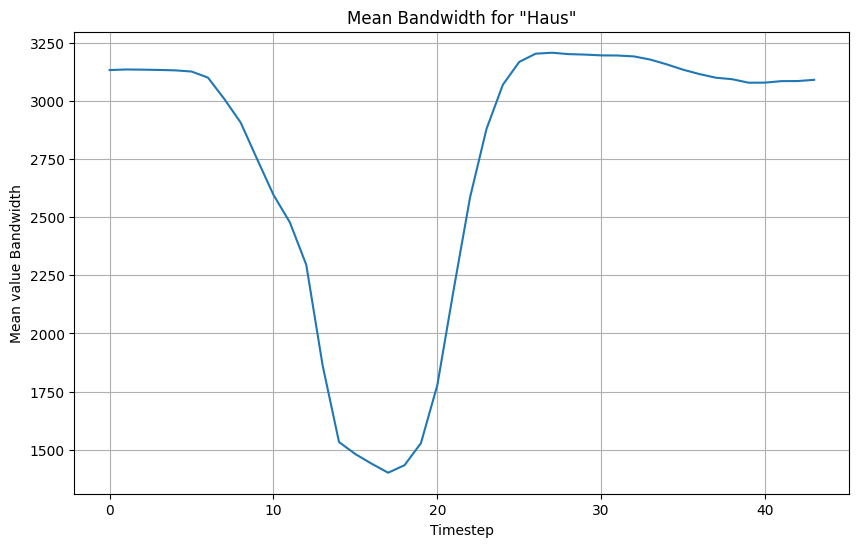

In [15]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data_Haus.mean(axis=0))  # По оси X будут временные шаги, по оси Y - средние значения Bandwidth для слова "Haus"
plt.xlabel('Timestep')
plt.ylabel('Mean value Bandwidth')
plt.title('Mean Bandwidth for "Haus"')
plt.grid(True)
plt.show()



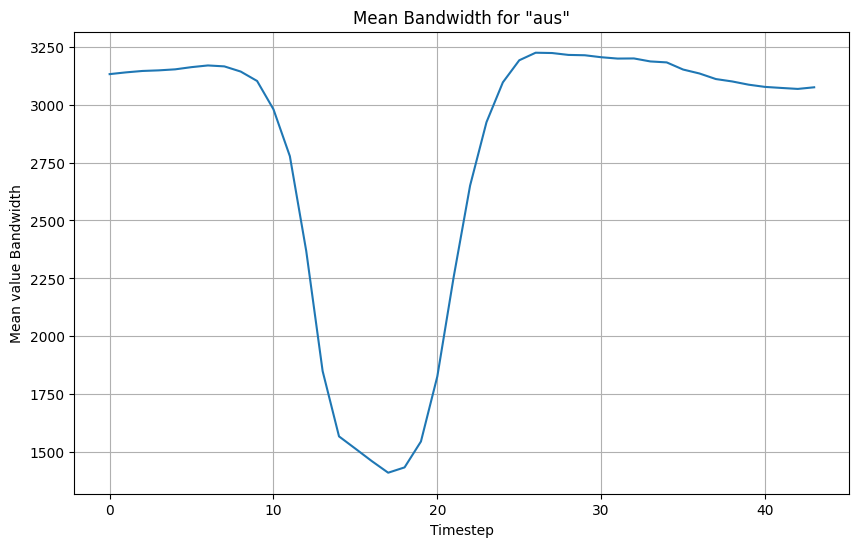

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data_aus.mean(axis=0))  # По оси X будут временные шаги, по оси Y - средние значения Bandwidth для слова "Haus"
plt.xlabel('Timestep')
plt.ylabel('Mean value Bandwidth')
plt.title('Mean Bandwidth for "aus"')
plt.grid(True)
plt.show()


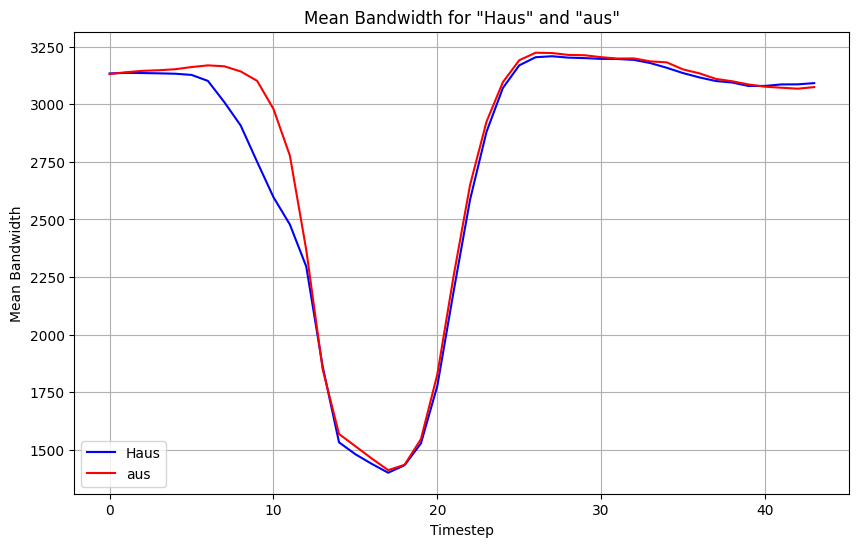

In [13]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(bandwidth_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(bandwidth_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Bandwidth')
plt.title('Mean Bandwidth for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**Centroid**

In [17]:
idx_centroid_0 = features_name[features_name['feature_name'] == 'centroid_0'].index
idx_centroid_0

Index([1], dtype='int64')

In [18]:
centroid_data_Haus = dev_arr[idx_haus, idx_centroid_0, :]
centroid_data_aus = dev_arr[idx_aus, idx_centroid_0, :]

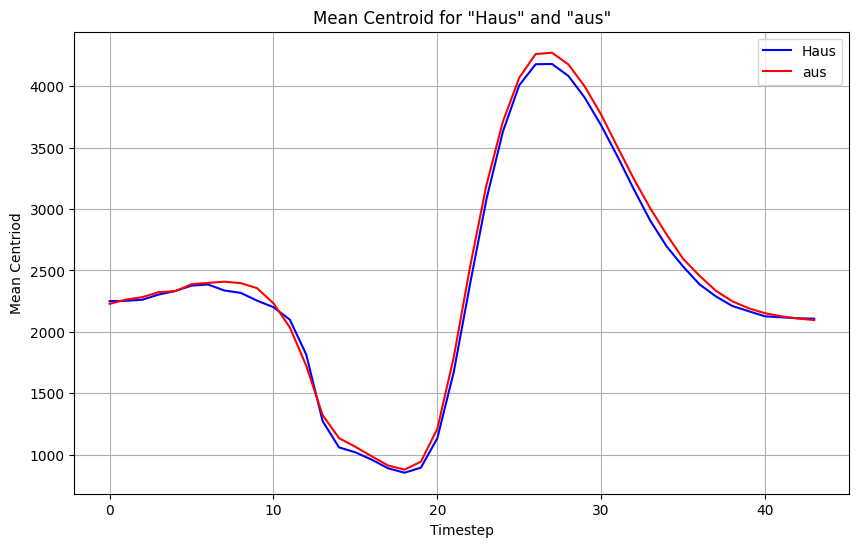

In [19]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(centroid_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(centroid_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Centriod')
plt.title('Mean Centroid for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**Contrast 0-6**

In [20]:

idx_contrast = features_name[features_name['feature_name'].str.contains('contrast')].index



In [21]:
idx_haus_np = np.array(idx_haus)
idx_contrast_np = np.array(idx_contrast)

# Select all features corresponding to the contrast indices for the word "Haus"
contrast_data_Haus = dev_arr[idx_haus_np[:, np.newaxis], idx_contrast_np, :]

contrast_data_Haus.shape

(2042, 7, 44)

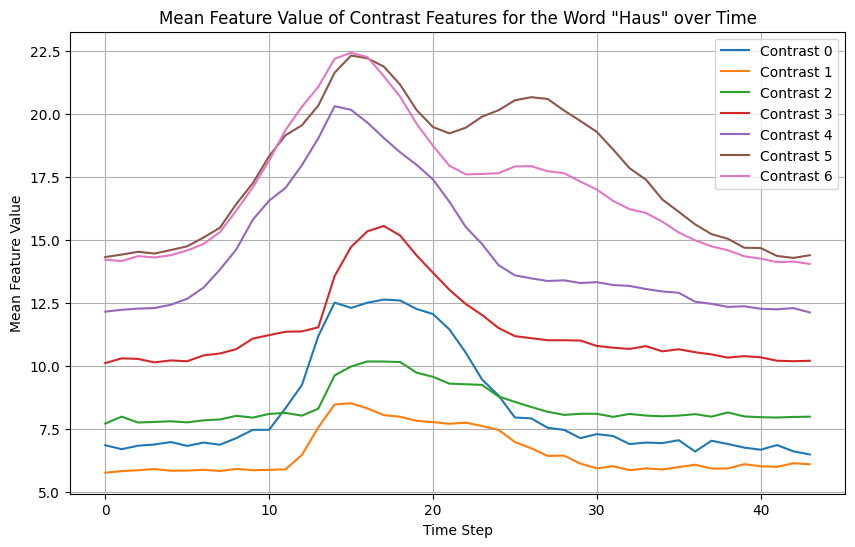

In [22]:
# Iterate over each contrast feature
plt.figure(figsize=(10, 6))
for i in range(contrast_data_Haus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(contrast_data_Haus[:, i, :].mean(axis=0), label=f'Contrast {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean Feature Value')
plt.title('Mean Feature Value of Contrast Features for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

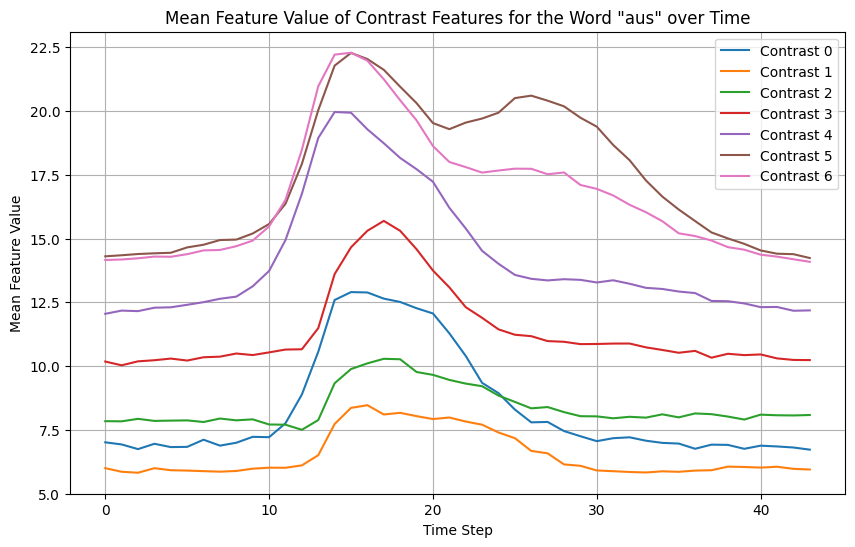

In [20]:
idx_aus_np = np.array(idx_aus)
idx_contrast_np = np.array(idx_contrast)

# Select all features corresponding to the contrast indices for the word "Haus"
contrast_data_aus = dev_arr[idx_aus_np[:, np.newaxis], idx_contrast_np, :]

contrast_data_aus.shape

plt.figure(figsize=(10, 6))
for i in range(contrast_data_aus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(contrast_data_aus[:, i, :].mean(axis=0), label=f'Contrast {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean Feature Value')
plt.title('Mean Feature Value of Contrast Features for the Word "aus" over Time')
plt.legend()
plt.grid(True)
plt.show()

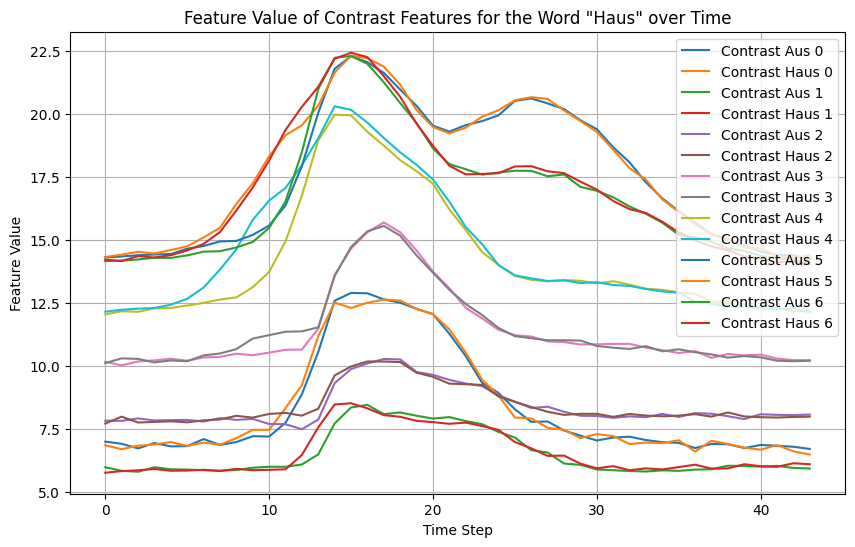

In [21]:
plt.figure(figsize=(10, 6))
for i in range(contrast_data_aus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(contrast_data_aus[:, i, :].mean(axis=0), label=f'Contrast Aus {i}') 
    plt.plot(contrast_data_Haus[:, i, :].mean(axis=0), label=f'Contrast Haus {i}') 
     # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Feature Value of Contrast Features for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

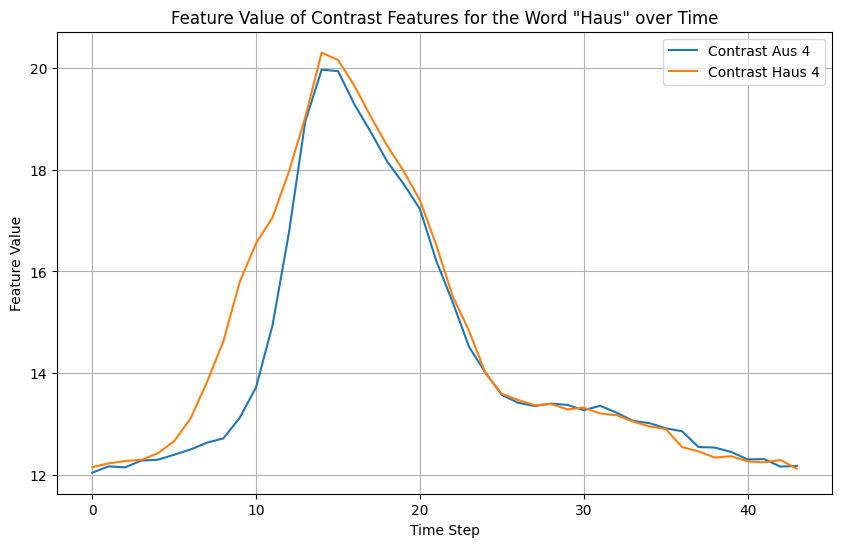

In [22]:
plt.figure(figsize=(10, 6))
  # Iterate over each of the 7 contrast features
plt.plot(contrast_data_aus[:, 4, :].mean(axis=0), label=f'Contrast Aus 4') 
plt.plot(contrast_data_Haus[:, 4, :].mean(axis=0), label=f'Contrast Haus 4') 
     # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Feature Value of Contrast Features for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

**Energy**

In [23]:
idx_energy_0 = features_name[features_name['feature_name'] == 'energy_0'].index
idx_energy_0

Index([9], dtype='int64')

In [24]:
energy_data_Haus = dev_arr[idx_haus, idx_energy_0, :]
energy_data_aus = dev_arr[idx_aus, idx_energy_0, :]

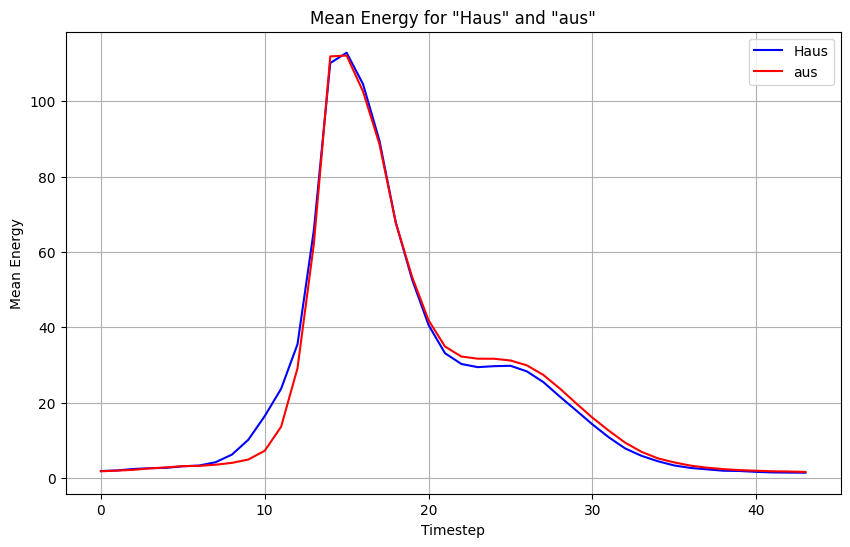

In [25]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(energy_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(energy_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Energy')
plt.title('Mean Energy for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**Flatness**

In [26]:
idx_flatness_0 = features_name[features_name['feature_name'] == 'flatness_0'].index
idx_flatness_0

Index([10], dtype='int64')

In [27]:
flatness_data_Haus = dev_arr[idx_haus, idx_flatness_0, :]
flatness_data_aus = dev_arr[idx_aus, idx_flatness_0, :]

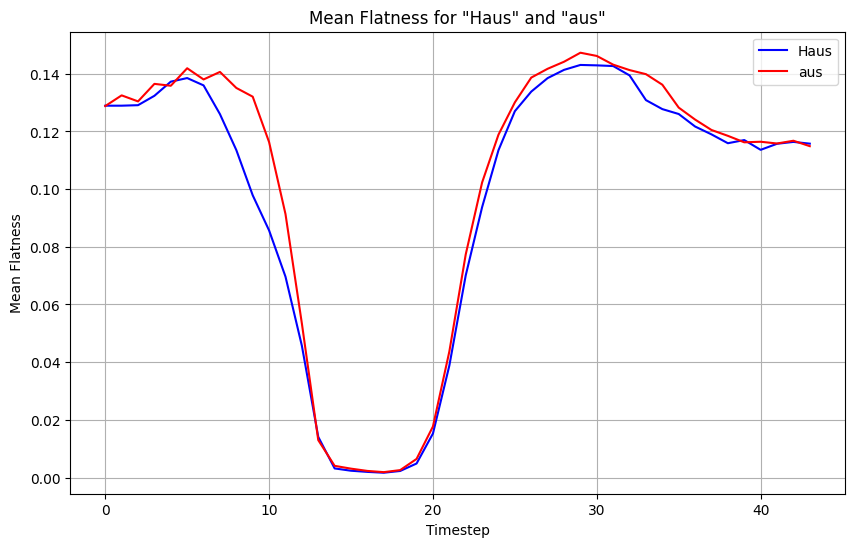

In [28]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(flatness_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(flatness_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Flatness')
plt.title('Mean Flatness for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**Flux**

In [29]:
idx_flux_0 = features_name[features_name['feature_name'] == 'flux_0'].index
idx_flux_0

Index([11], dtype='int64')

In [30]:
flux_data_Haus = dev_arr[idx_haus, idx_flux_0, :]
flux_data_aus = dev_arr[idx_aus, idx_flux_0, :]

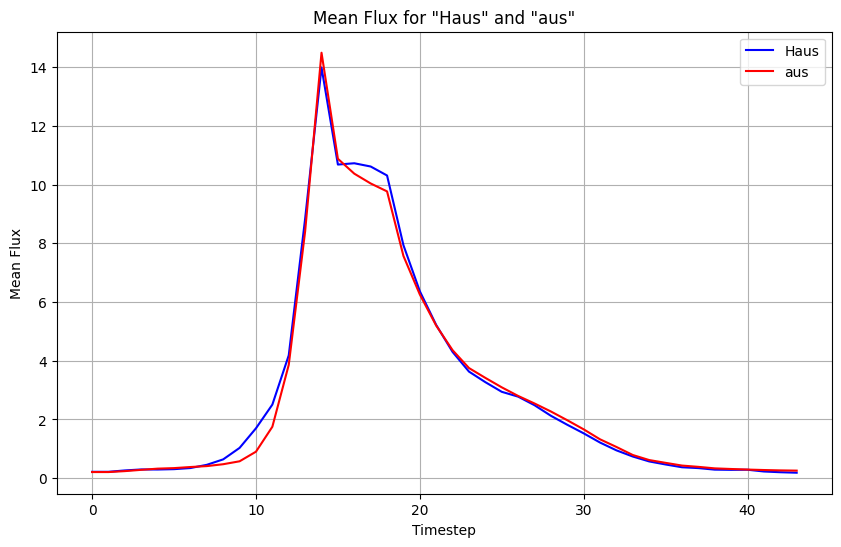

In [31]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(flux_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(flux_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Flux')
plt.title('Mean Flux for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**Melspect 0 - 63**

In [32]:
idx_melspect = features_name[features_name['feature_name'].str.contains('melspect')].index
idx_melspect

Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 73, 74, 75],
      dtype='int64')

In [33]:

idx_melspect_np = np.array(idx_melspect)
melspect_data_Haus = dev_arr[idx_haus_np[:, np.newaxis], idx_melspect_np, :]

melspect_data_Haus.shape


(2042, 64, 44)

In [34]:
melspect_data_aus = dev_arr[idx_aus_np[:, np.newaxis], idx_melspect_np, :]
melspect_data_aus.shape

(2041, 64, 44)

(2042, 44)


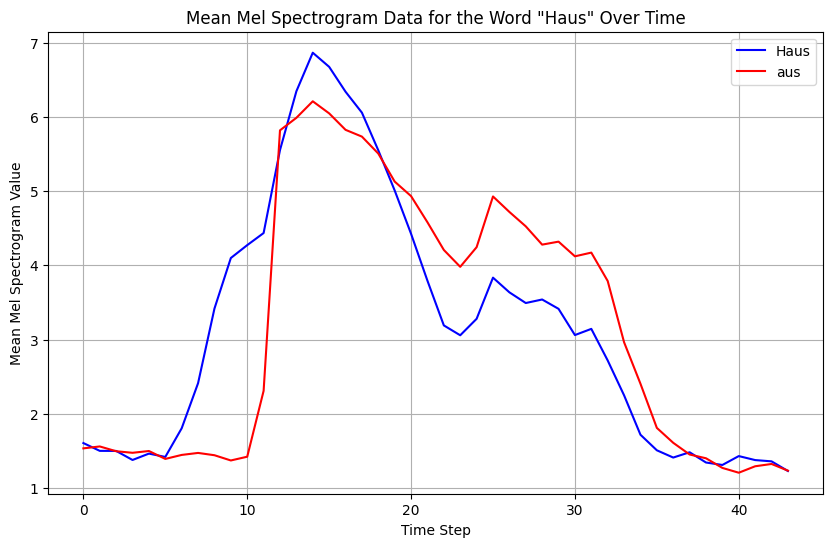

In [35]:
mean_melspect_data_Haus = np.mean(melspect_data_Haus, axis=1)
mean_melspect_data_aus = np.mean(melspect_data_aus, axis=1)

print(mean_melspect_data_Haus.shape)

plt.figure(figsize=(10, 6))
plt.plot(mean_melspect_data_Haus[0, :], label='Haus', color='blue')
plt.plot(mean_melspect_data_aus[0, :], label='aus', color='red')   # Assuming you want to plot the first sample
plt.xlabel('Time Step')
plt.ylabel('Mean Mel Spectrogram Value')
plt.title('Mean Mel Spectrogram Data for the Word "Haus" Over Time')
plt.grid(True)
plt.legend()
plt.show()

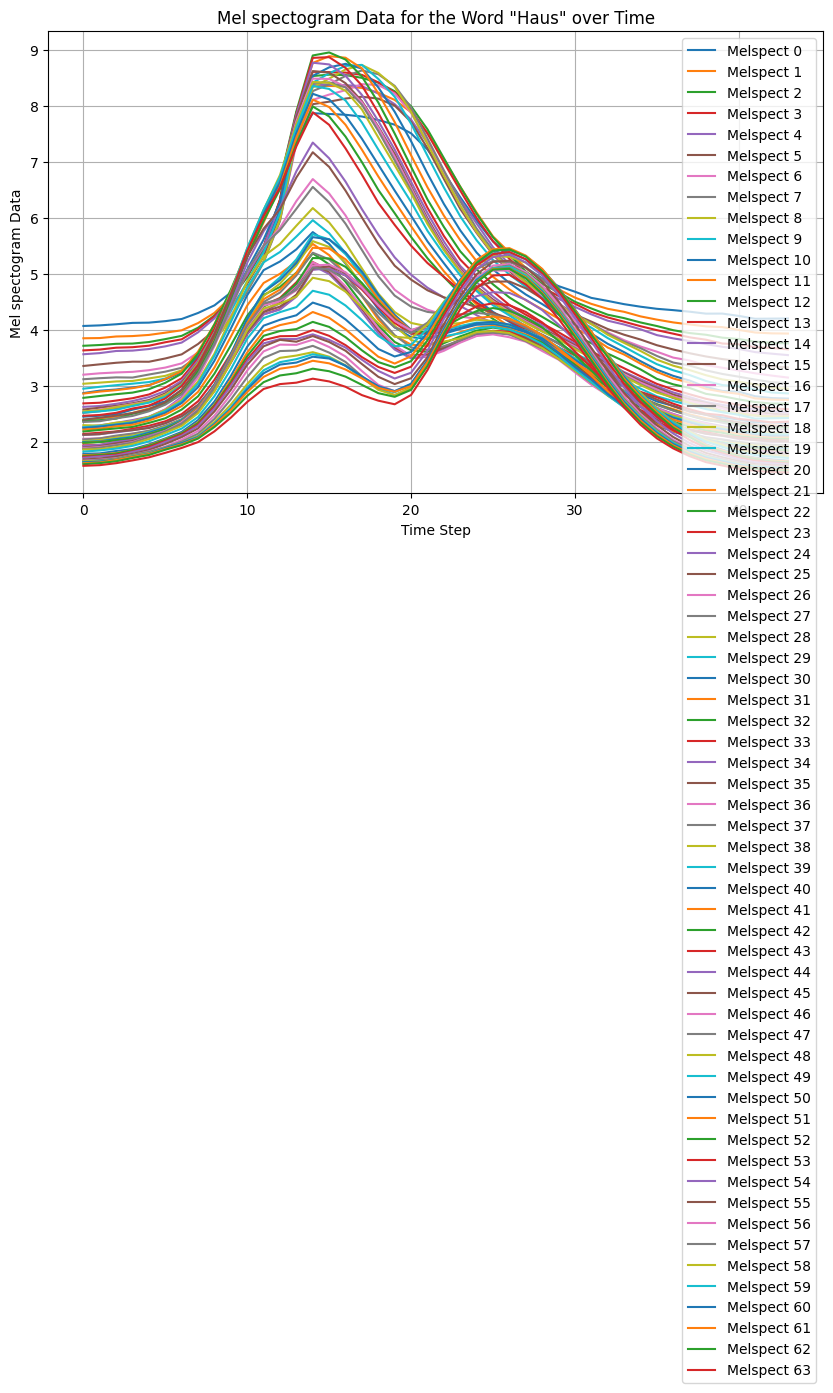

In [36]:
plt.figure(figsize=(10, 6))
for i in range(melspect_data_Haus.shape[1]): 
    plt.plot(melspect_data_Haus[:, i, :].mean(axis=0), label=f'Melspect {i}')  
plt.xlabel('Time Step')
plt.ylabel('Mel spectogram Data')
plt.title('Mel spectogram Data for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

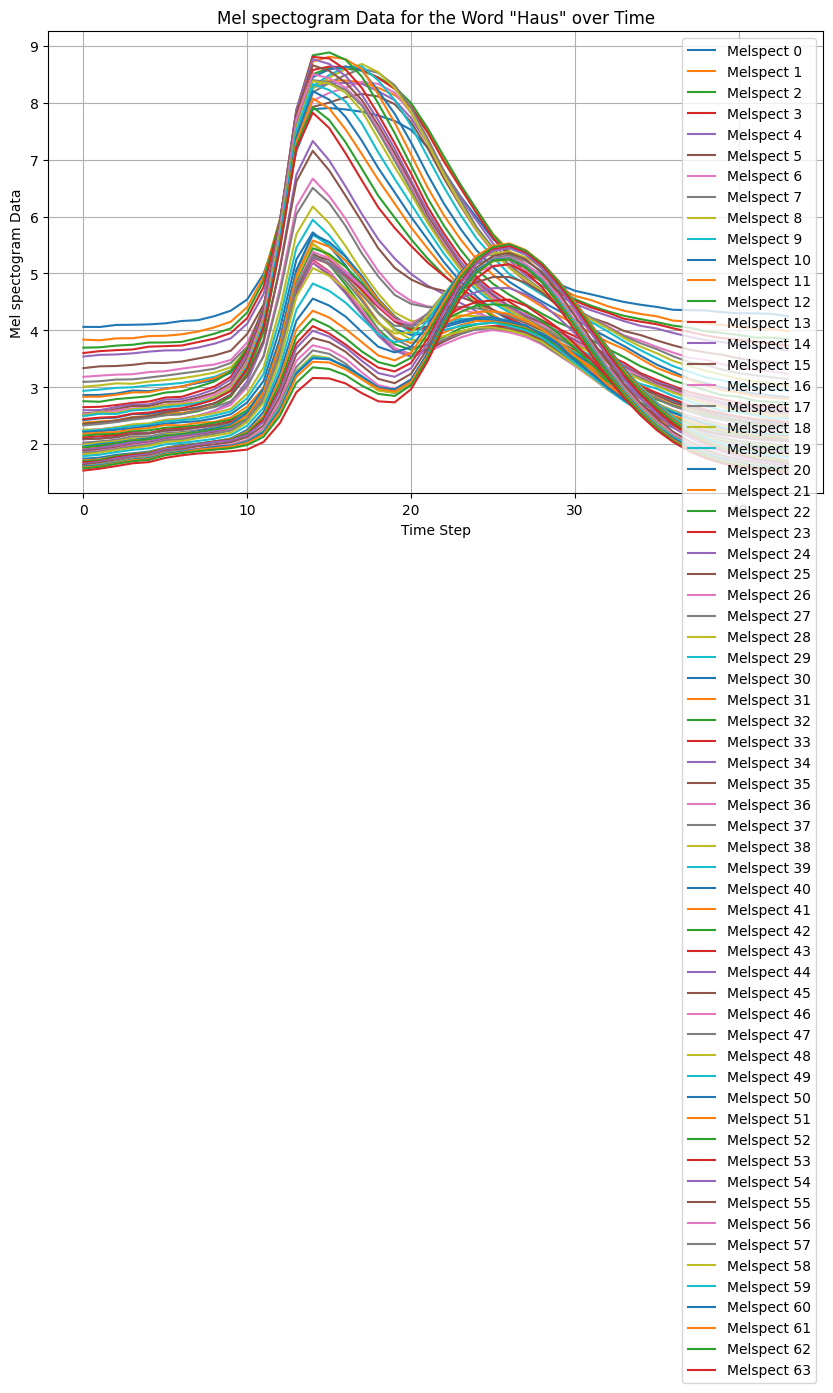

In [37]:
plt.figure(figsize=(10, 6))
for i in range(melspect_data_aus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(melspect_data_aus[:, i, :].mean(axis=0), label=f'Melspect {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mel spectogram Data')
plt.title('Mel spectogram Data for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

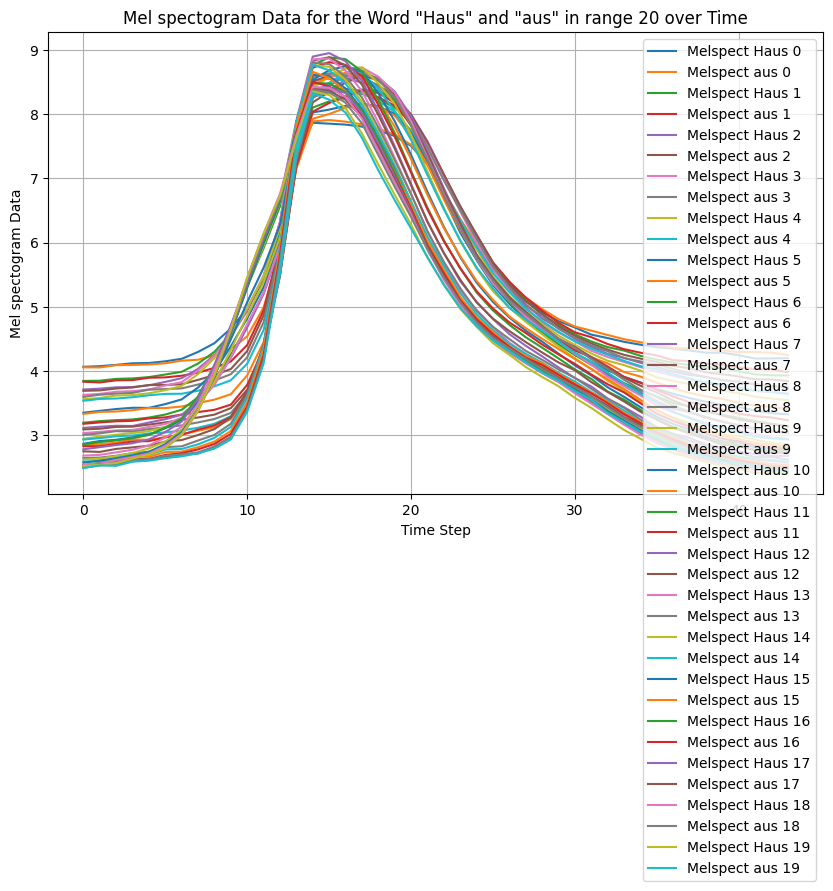

In [38]:
plt.figure(figsize=(10, 6))
for i in range(20):  # Iterate over each of the 7 contrast features
    plt.plot(melspect_data_Haus[:, i, :].mean(axis=0), label=f'Melspect Haus {i}')
    plt.plot(melspect_data_aus[:, i, :].mean(axis=0), label=f'Melspect aus {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mel spectogram Data')
plt.title('Mel spectogram Data for the Word "Haus" and "aus" in range 20 over Time')
plt.legend()
plt.grid(True)
plt.show()

**MFCC_0 - 31**

In [39]:
idx_mfcc = features_name[features_name['feature_name'].str.contains('mfcc')].index
idx_mfcc

Index([ 76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171],
      dtype='int64')

In [40]:
idx_mfcc_np = np.array(idx_mfcc)
mfcc_data_Haus = dev_arr[idx_haus_np[:, np.newaxis], idx_mfcc_np, :]

mfcc_data_Haus.shape

(2042, 96, 44)

In [41]:
mfcc_data_aus = dev_arr[idx_aus_np[:, np.newaxis], idx_mfcc_np, :]
mfcc_data_aus.shape

(2041, 96, 44)

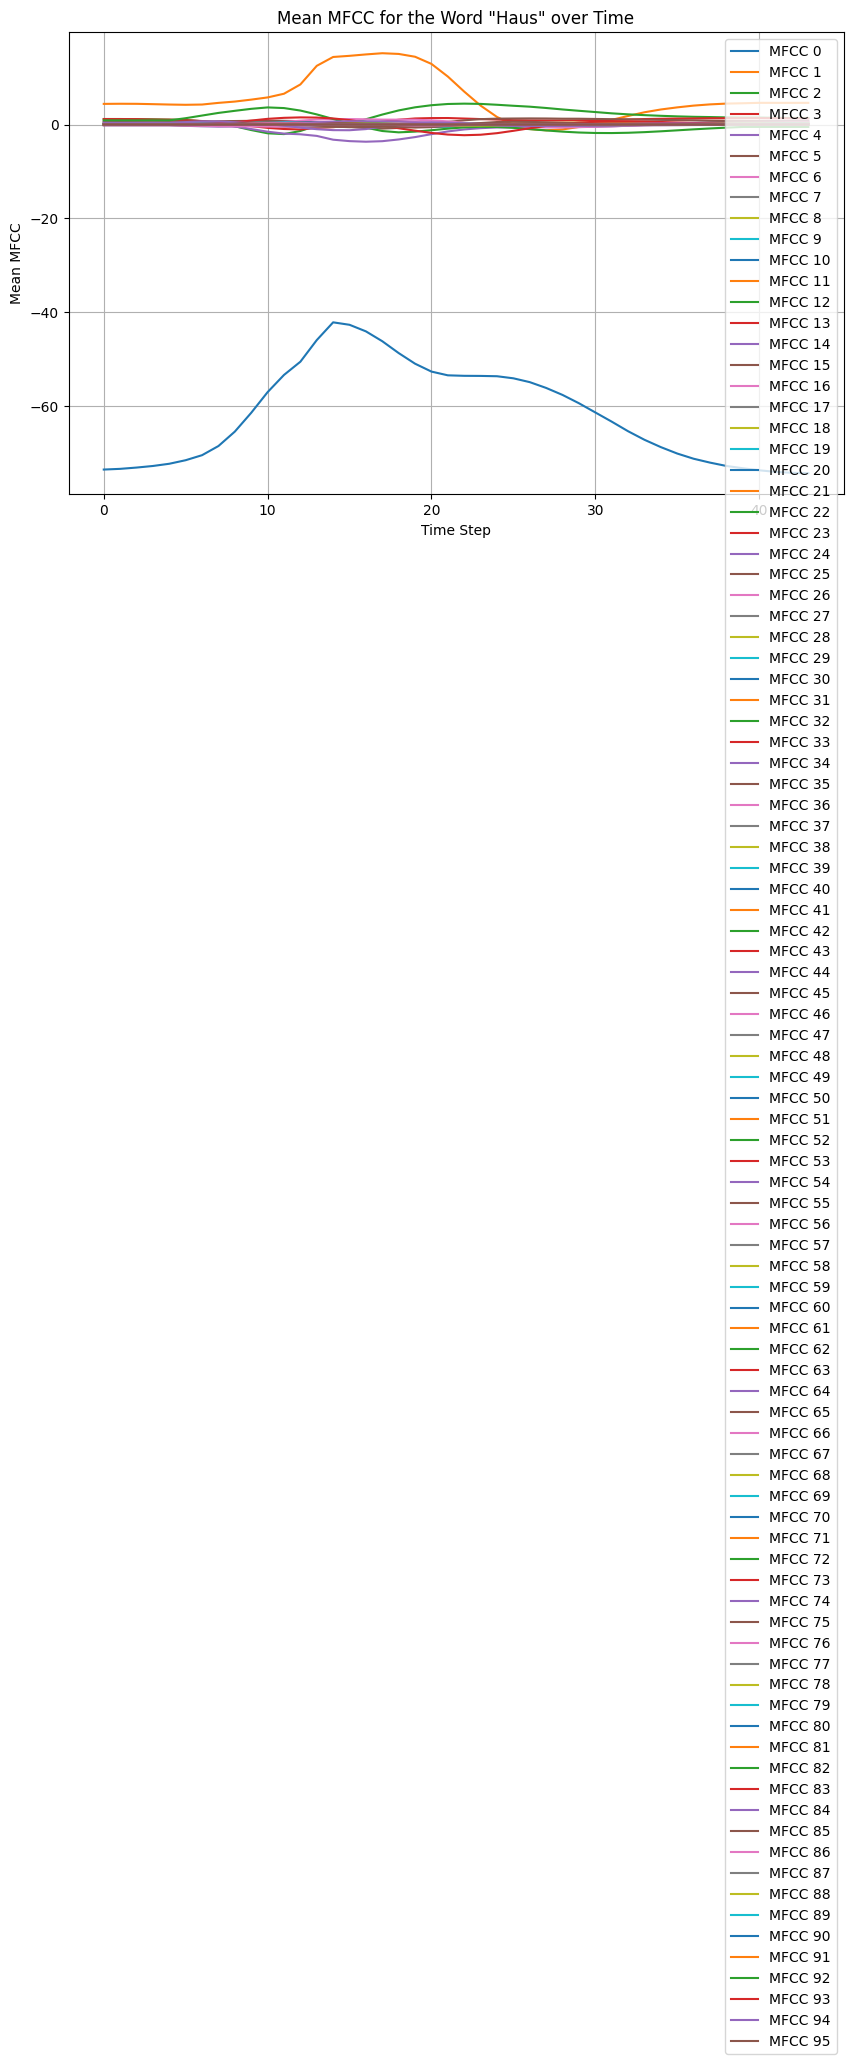

In [42]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_data_Haus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(mfcc_data_Haus[:, i, :].mean(axis=0), label=f'MFCC {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC')
plt.title('Mean MFCC for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

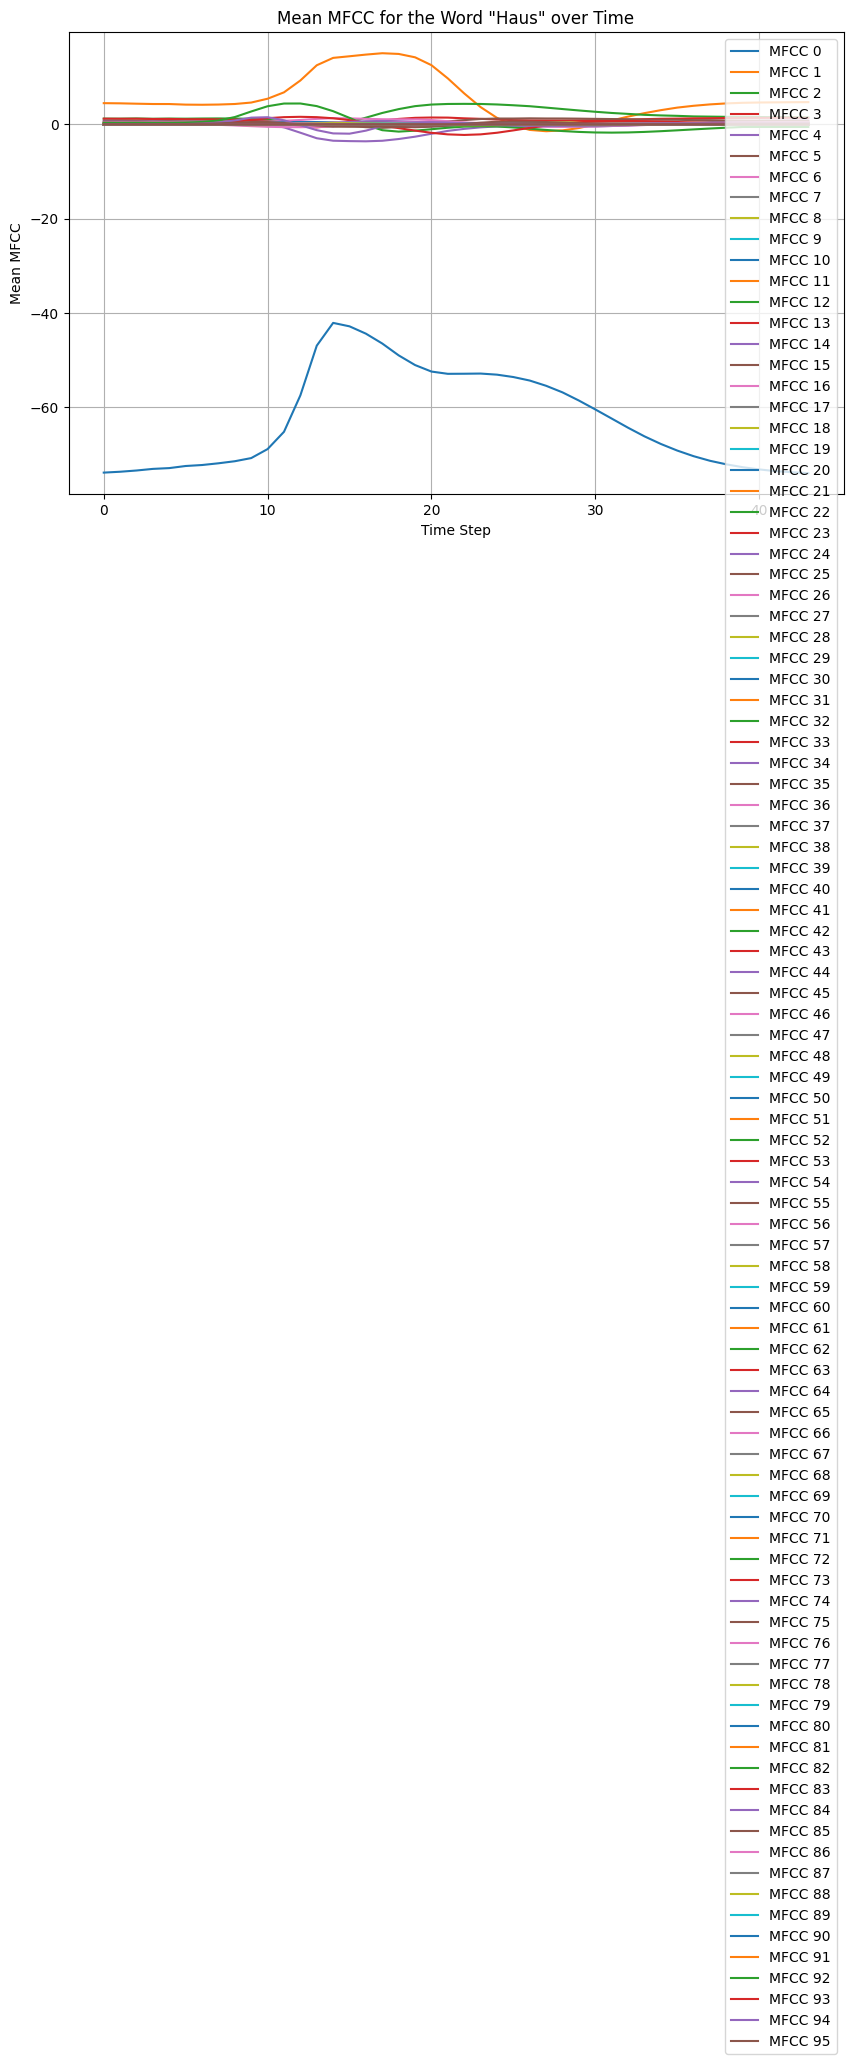

In [43]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_data_aus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(mfcc_data_aus[:, i, :].mean(axis=0), label=f'MFCC {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC')
plt.title('Mean MFCC for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

(2042, 44)


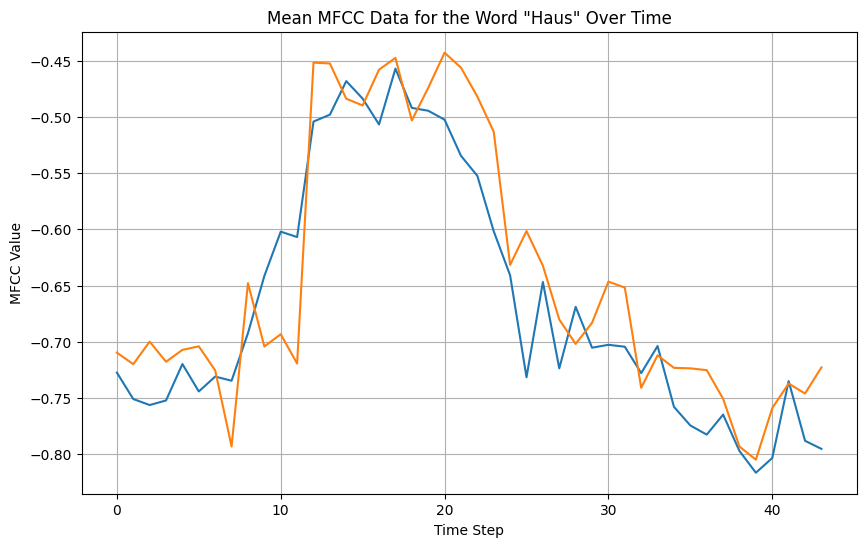

In [44]:
mean_mfcc_data_Haus = np.mean(mfcc_data_Haus, axis=1)
mean_mfcc_data_aus = np.mean(mfcc_data_aus, axis=1)

print(mean_mfcc_data_Haus.shape)

plt.figure(figsize=(10, 6))
plt.plot(mean_mfcc_data_Haus[0, :])
plt.plot(mean_mfcc_data_aus[0, :])   # Assuming you want to plot the first sample
plt.xlabel('Time Step')
plt.ylabel('MFCC Value')
plt.title('Mean MFCC Data for the Word "Haus" Over Time')
plt.grid(True)
plt.show()

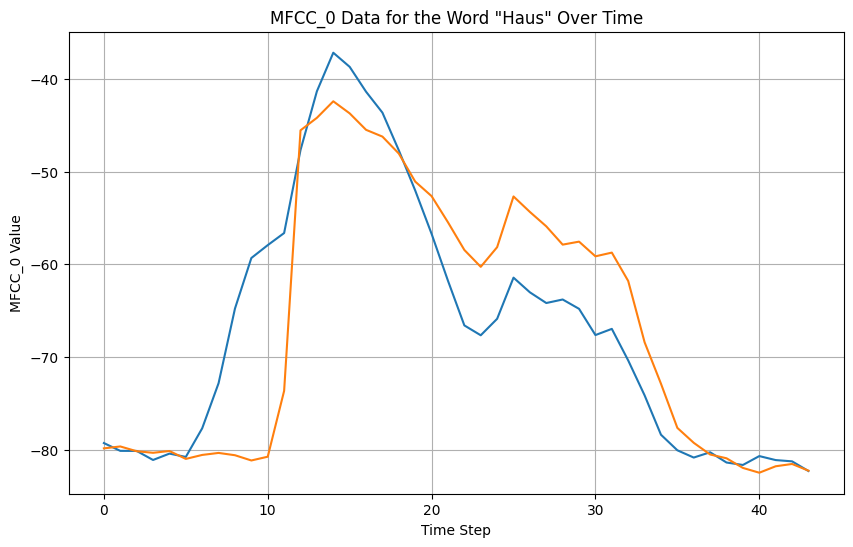

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(mfcc_data_Haus[0, 0])
plt.plot(mfcc_data_aus[0, 0])   # Assuming you want to plot the first sample
plt.xlabel('Time Step')
plt.ylabel('MFCC_0 Value')
plt.title('MFCC_0 Data for the Word "Haus" Over Time')
plt.grid(True)
plt.show()

**MFCC_D**

In [46]:
idx_mfcc_d = features_name[features_name['feature_name'].str.contains('mfcc_d_')].index
idx_mfcc_d

Index([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139],
      dtype='int64')

In [48]:
idx_mfcc_d_np = np.array(idx_mfcc_d)
mfcc_d_data_Haus = dev_arr[idx_haus_np[:, np.newaxis], idx_mfcc_d_np, :]

mfcc_d_data_Haus.shape

(2042, 32, 44)

In [49]:

mfcc_d_data_aus = dev_arr[idx_aus_np[:, np.newaxis], idx_mfcc_d_np, :]

mfcc_d_data_aus.shape

(2041, 32, 44)

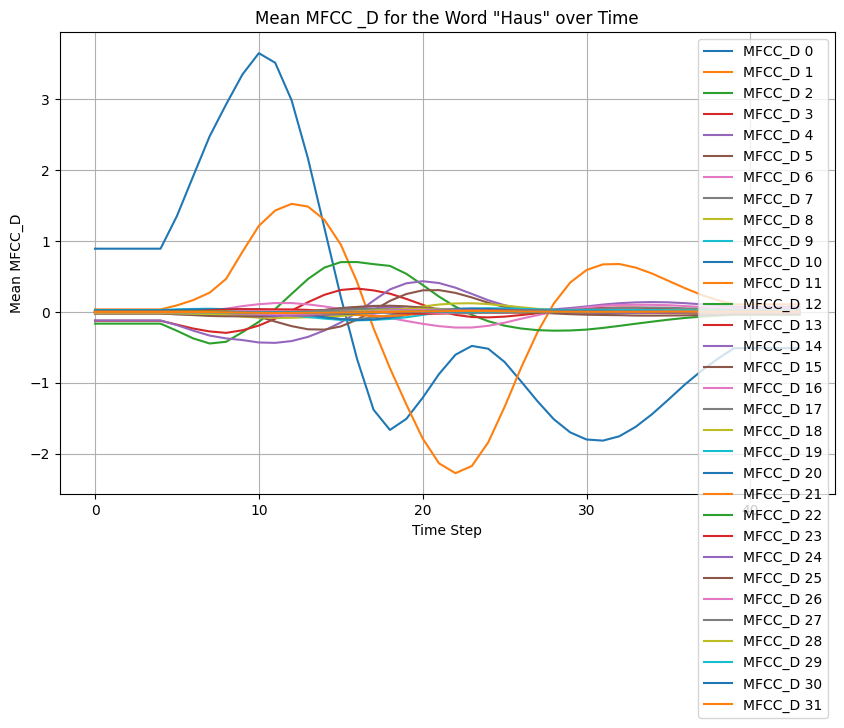

In [50]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_d_data_Haus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(mfcc_d_data_Haus[:, i, :].mean(axis=0), label=f'MFCC_D {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D')
plt.title('Mean MFCC _D for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

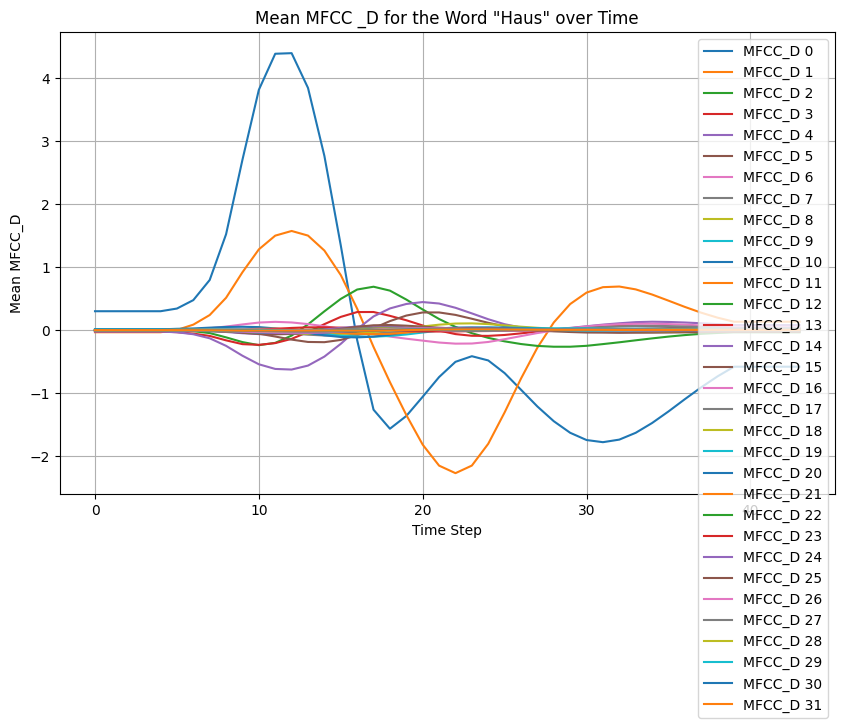

In [51]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_d_data_aus.shape[1]):  # Iterate over each of the 7 contrast features
    plt.plot(mfcc_d_data_aus[:, i, :].mean(axis=0), label=f'MFCC_D {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D')
plt.title('Mean MFCC _D for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

(2042, 44)


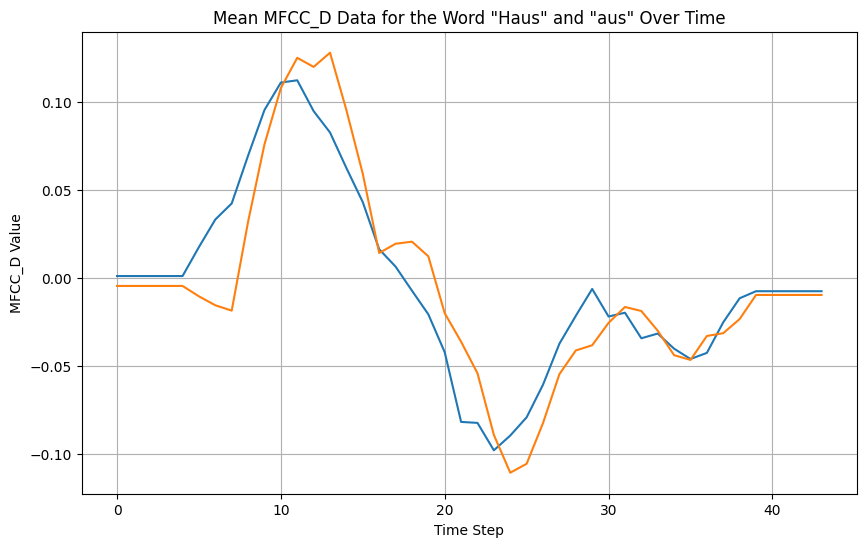

In [52]:
mean_mfcc_d_data_Haus = np.mean(mfcc_d_data_Haus, axis=1)
mean_mfcc_d_data_aus = np.mean(mfcc_d_data_aus, axis=1)

print(mean_mfcc_d_data_Haus.shape)

plt.figure(figsize=(10, 6))
plt.plot(mean_mfcc_d_data_Haus[0, :])
plt.plot(mean_mfcc_d_data_aus[0, :])   # Assuming you want to plot the first sample
plt.xlabel('Time Step')
plt.ylabel('MFCC_D Value')
plt.title('Mean MFCC_D Data for the Word "Haus" and "aus" Over Time')
plt.grid(True)
plt.show()

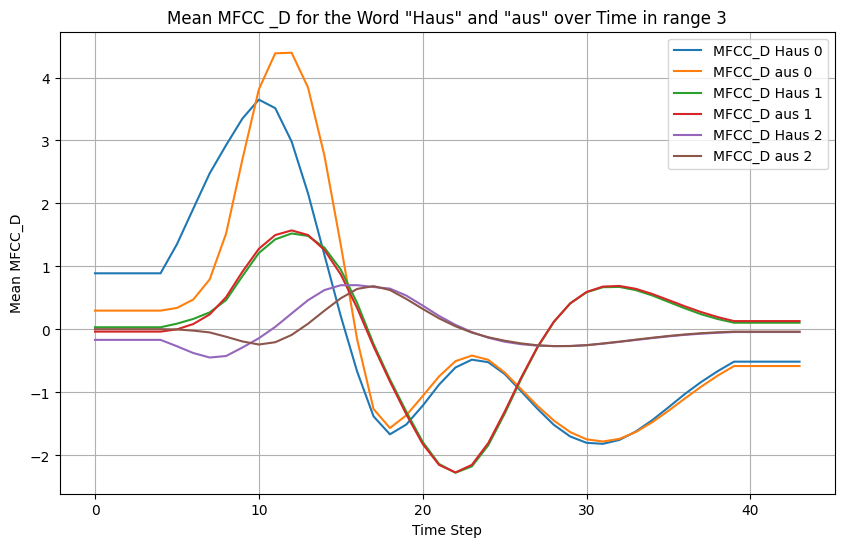

In [53]:
plt.figure(figsize=(10, 6))
for i in range(3):  # Iterate over each of the 7 contrast features
    plt.plot(mfcc_d_data_Haus[:, i, :].mean(axis=0), label=f'MFCC_D Haus {i}')
    plt.plot(mfcc_d_data_aus[:, i, :].mean(axis=0), label=f'MFCC_D aus {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D')
plt.title('Mean MFCC _D for the Word "Haus" and "aus" over Time in range 3')
plt.legend()
plt.grid(True)
plt.show()

**MFCC_D2**

In [54]:
idx_mfcc_d2 = features_name[features_name['feature_name'].str.contains('mfcc_d2')].index
idx_mfcc_d2

Index([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171],
      dtype='int64')

In [55]:
idx_mfcc_d2_np = np.array(idx_mfcc_d2)
mfcc_d2_data_Haus = dev_arr[idx_haus_np[:, np.newaxis], idx_mfcc_d2_np, :]

mfcc_d2_data_Haus.shape

(2042, 32, 44)

In [56]:
mfcc_d2_data_aus = dev_arr[idx_aus_np[:, np.newaxis], idx_mfcc_d2_np, :]

mfcc_d2_data_aus.shape

(2041, 32, 44)

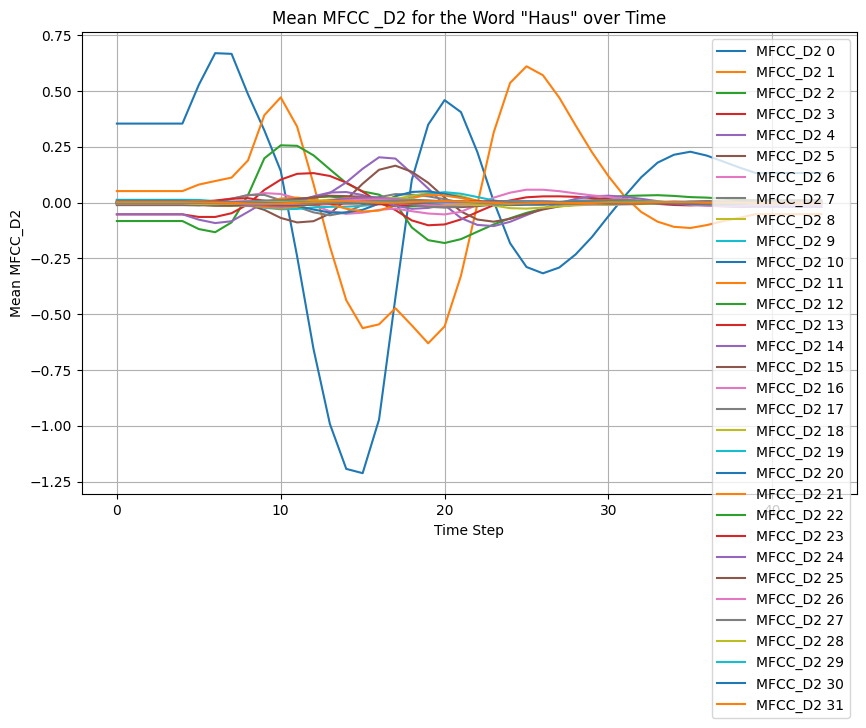

In [57]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_d2_data_Haus.shape[1]):  
    plt.plot(mfcc_d2_data_Haus[:, i, :].mean(axis=0), label=f'MFCC_D2 {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D2')
plt.title('Mean MFCC _D2 for the Word "Haus" over Time')
plt.legend()
plt.grid(True)
plt.show()

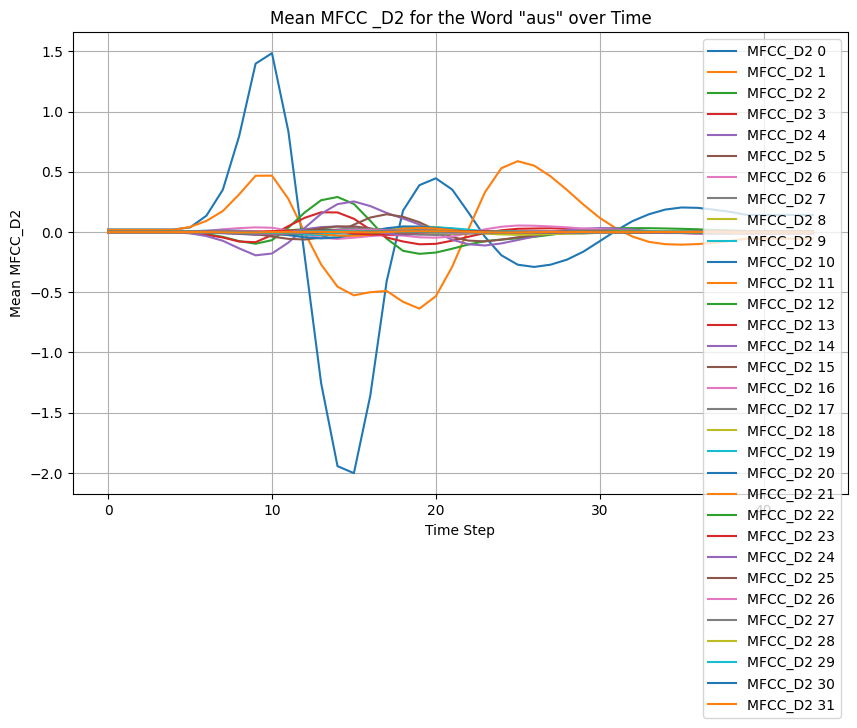

In [58]:
plt.figure(figsize=(10, 6))
for i in range(mfcc_d2_data_aus.shape[1]):  
    plt.plot(mfcc_d2_data_aus[:, i, :].mean(axis=0), label=f'MFCC_D2 {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D2')
plt.title('Mean MFCC _D2 for the Word "aus" over Time')
plt.legend()
plt.grid(True)
plt.show()

(2042, 44)


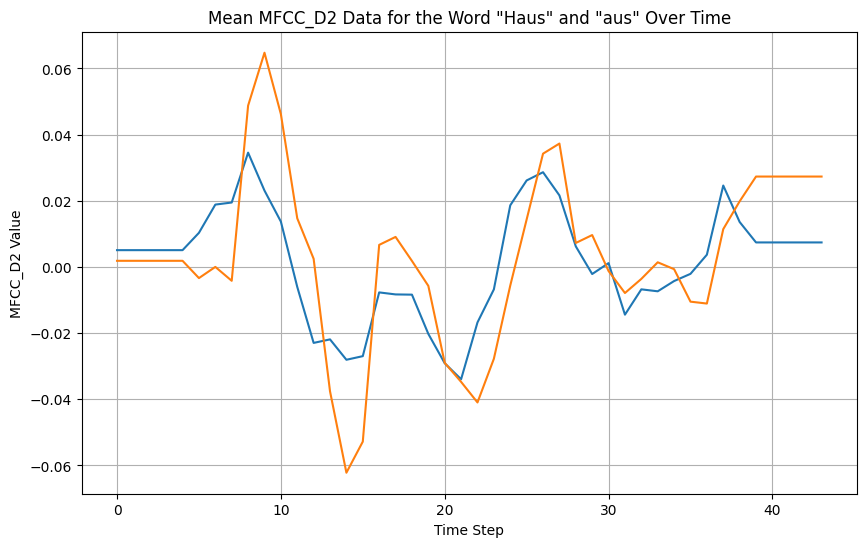

In [59]:
mean_mfcc_d2_data_Haus = np.mean(mfcc_d2_data_Haus, axis=1)
mean_mfcc_d2_data_aus = np.mean(mfcc_d2_data_aus, axis=1)

print(mean_mfcc_d2_data_Haus.shape)

plt.figure(figsize=(10, 6))
plt.plot(mean_mfcc_d2_data_Haus[0, :])
plt.plot(mean_mfcc_d2_data_aus[0, :])   # Assuming you want to plot the first sample
plt.xlabel('Time Step')
plt.ylabel('MFCC_D2 Value')
plt.title('Mean MFCC_D2 Data for the Word "Haus" and "aus" Over Time')
plt.grid(True)
plt.show()

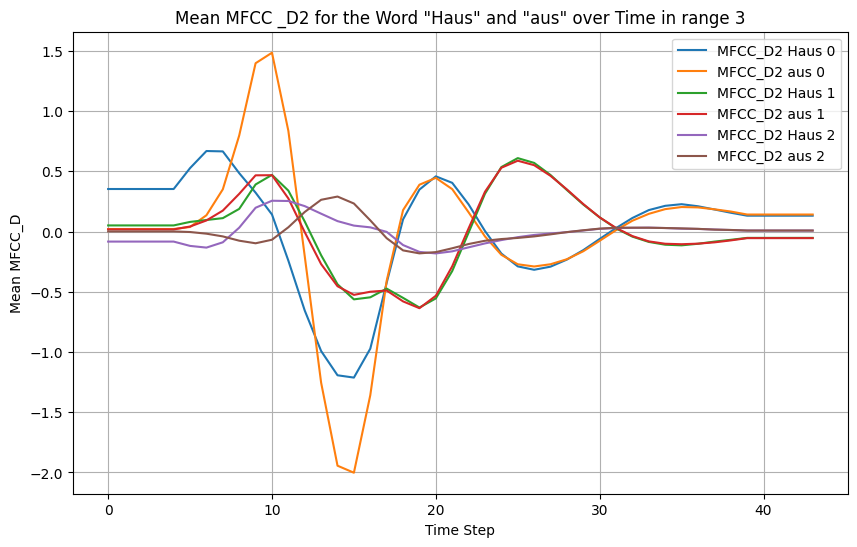

In [60]:
plt.figure(figsize=(10, 6))
for i in range(3):  
    plt.plot(mfcc_d2_data_Haus[:, i, :].mean(axis=0), label=f'MFCC_D2 Haus {i}')
    plt.plot(mfcc_d2_data_aus[:, i, :].mean(axis=0), label=f'MFCC_D2 aus {i}')  # Plot the mean value of each contrast feature
plt.xlabel('Time Step')
plt.ylabel('Mean MFCC_D')
plt.title('Mean MFCC _D2 for the Word "Haus" and "aus" over Time in range 3')
plt.legend()
plt.grid(True)
plt.show()

**Power**

In [63]:
idx_power = features_name[features_name['feature_name'] == 'power_0'].index
idx_power

Index([172], dtype='int64')

In [64]:
power_data_Haus = dev_arr[idx_haus, idx_power, :]
power_data_aus = dev_arr[idx_aus, idx_power, :]

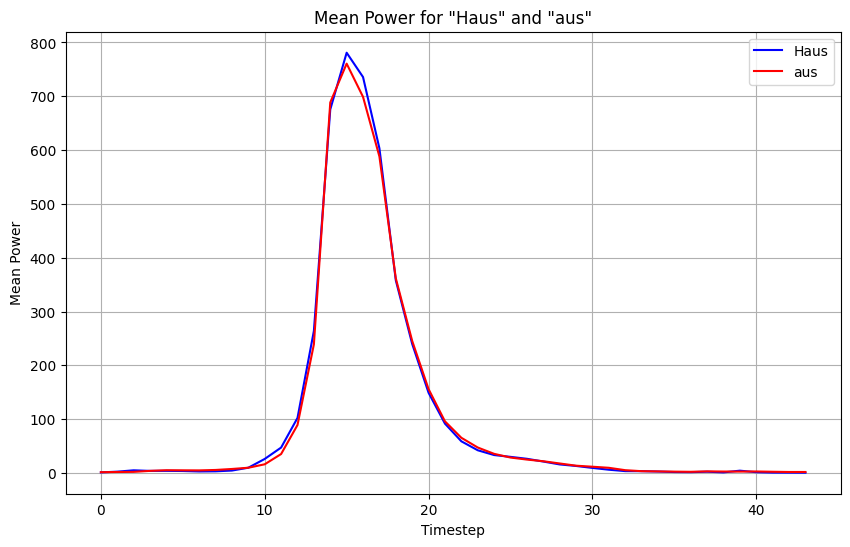

In [66]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(power_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(power_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean Power')
plt.title('Mean Power for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**YIN**

In [23]:
idx_yin = features_name[features_name['feature_name'] == 'yin_0'].index
idx_yin

Index([173], dtype='int64')

In [24]:
yin_data_Haus = dev_arr[idx_haus, idx_yin, :]
yin_data_aus = dev_arr[idx_aus, idx_yin, :]

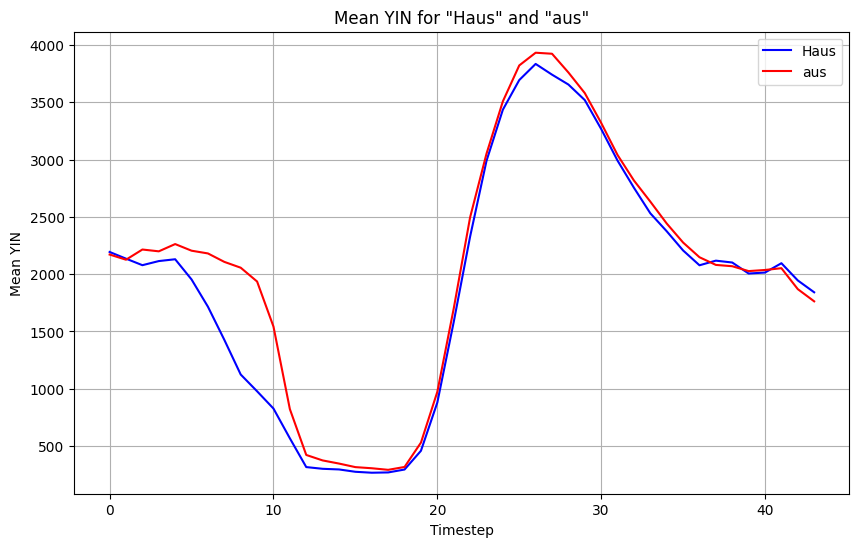

In [25]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(yin_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(yin_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean YIN')
plt.title('Mean YIN for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()

**ZCr**

In [72]:
idx_zcr = features_name[features_name['feature_name'] == 'zcr_0'].index
idx_zcr

Index([174], dtype='int64')

In [76]:
zcr_data_Haus = dev_arr[idx_haus, idx_zcr, :]
zcr_data_aus = dev_arr[idx_aus, idx_zcr, :]

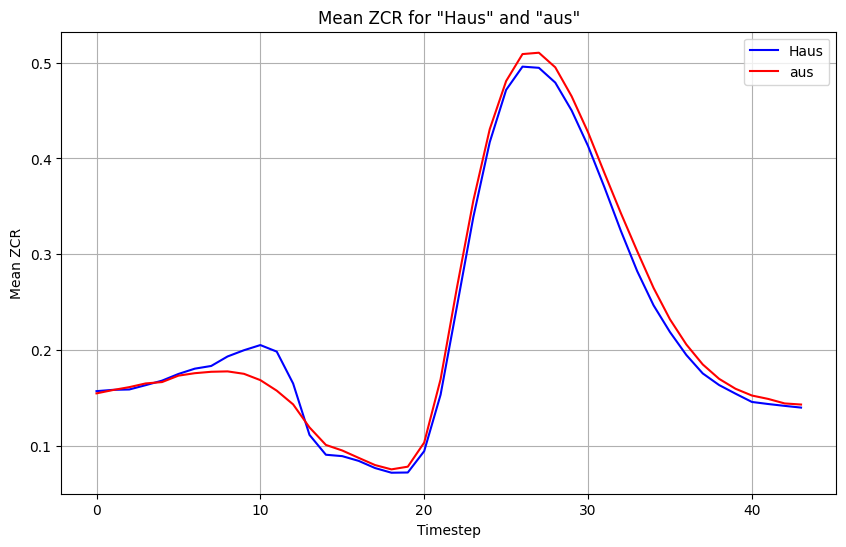

In [77]:
plt.figure(figsize=(10, 6))

# График для слова "Haus"
plt.plot(zcr_data_Haus.mean(axis=0), label='Haus', color='blue')

# График для слова "aus"
plt.plot(zcr_data_aus.mean(axis=0), label='aus', color='red')

plt.xlabel('Timestep')
plt.ylabel('Mean ZCR')
plt.title('Mean ZCR for "Haus" and "aus"')
plt.grid(True)
plt.legend()  # Добавляем легенду, чтобы показать, какой график относится к какому слову
plt.show()